Dataset shape: (1000, 19)

Columns: ['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'certificate_missing', 'meta_missing', 'gross_missing']

Summary statistics (numeric columns):
            Runtime  IMDB_Rating   Meta_score   No_of_Votes         Gross
count  1000.000000  1000.000000  1000.000000  1.000000e+03  1.000000e+03
mean    122.891000     7.949300    78.133000  2.736929e+05  5.653688e+07
std      28.093671     0.275491    11.368225  3.273727e+05  1.032382e+08
min      45.000000     7.600000    28.000000  2.508800e+04  0.000000e+00
25%     103.000000     7.700000    72.000000  5.552625e+04  4.457098e+05
50%     119.000000     7.900000    79.000000  1.385485e+05  1.070275e+07
75%     137.000000     8.100000    85.250000  3.741612e+05  6.153989e+07
max     321.000000     9.300000   100.000000  2.343110e+06  9.366622e+08

Missing value

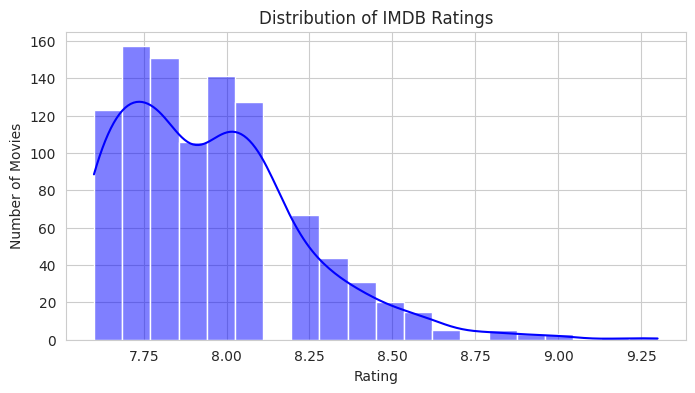

/tmp/ipython-input-3543868996.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette="Set2")


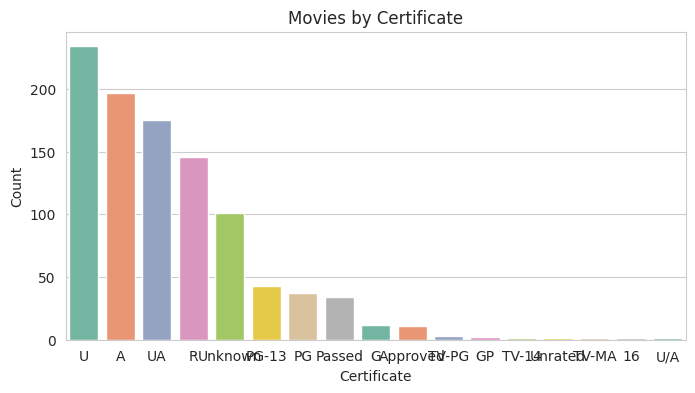

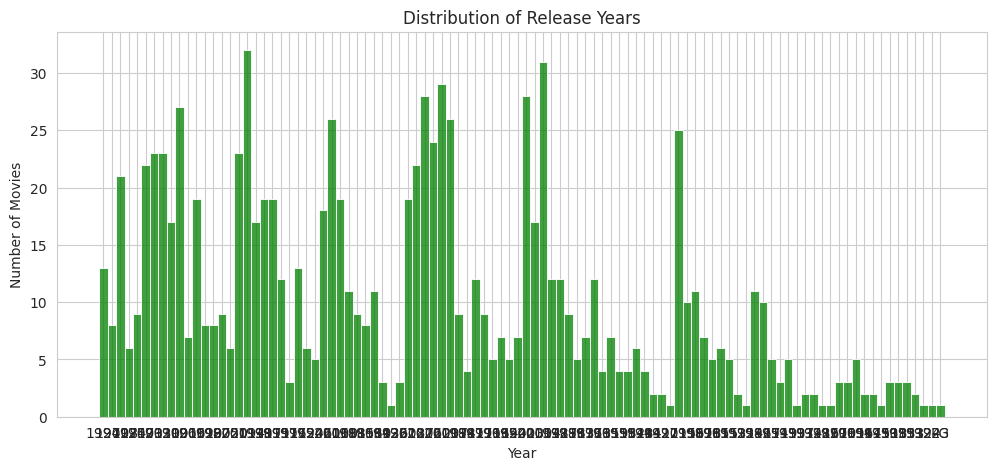

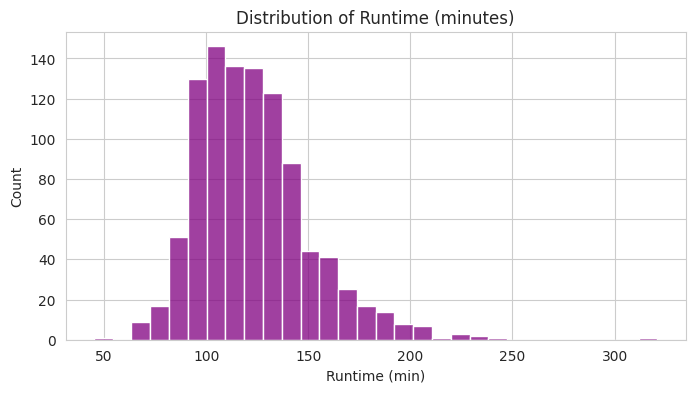


Top 10 Genres:
 Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Name: count, dtype: int64


/tmp/ipython-input-3543868996.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='magma')


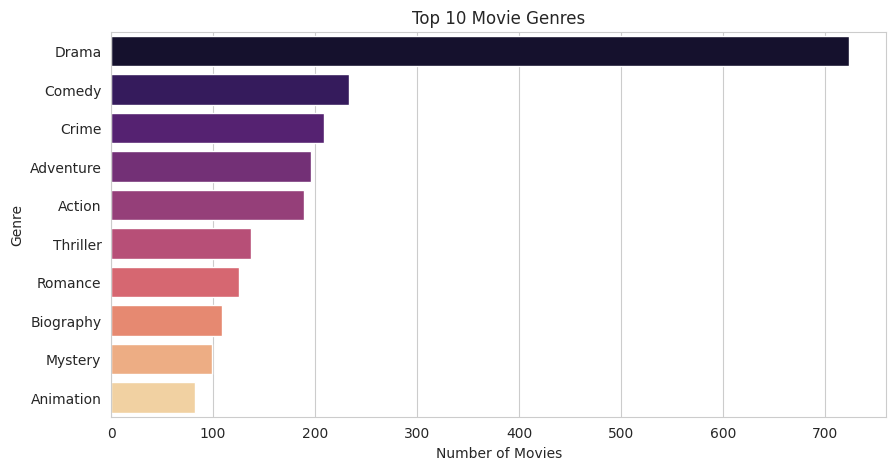


Top 10 Directors:
 Director
Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Akira Kurosawa       10
Martin Scorsese      10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
Clint Eastwood        8
Christopher Nolan     8
Name: count, dtype: int64


/tmp/ipython-input-3543868996.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


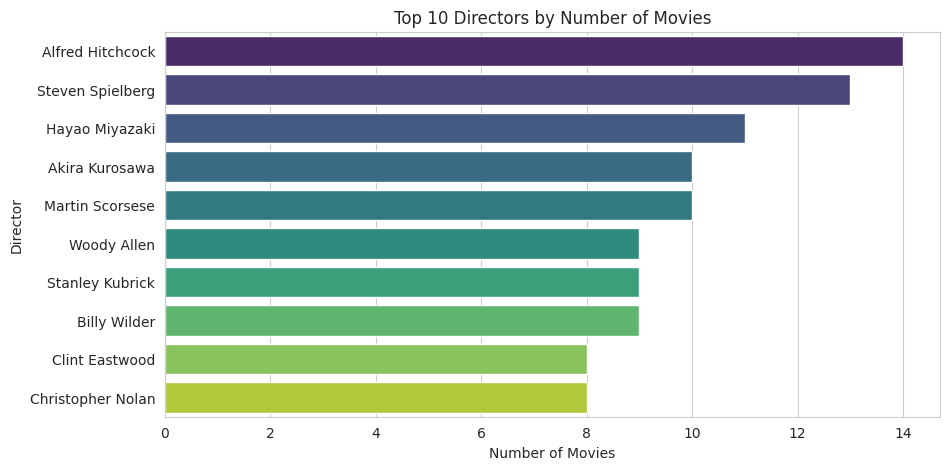

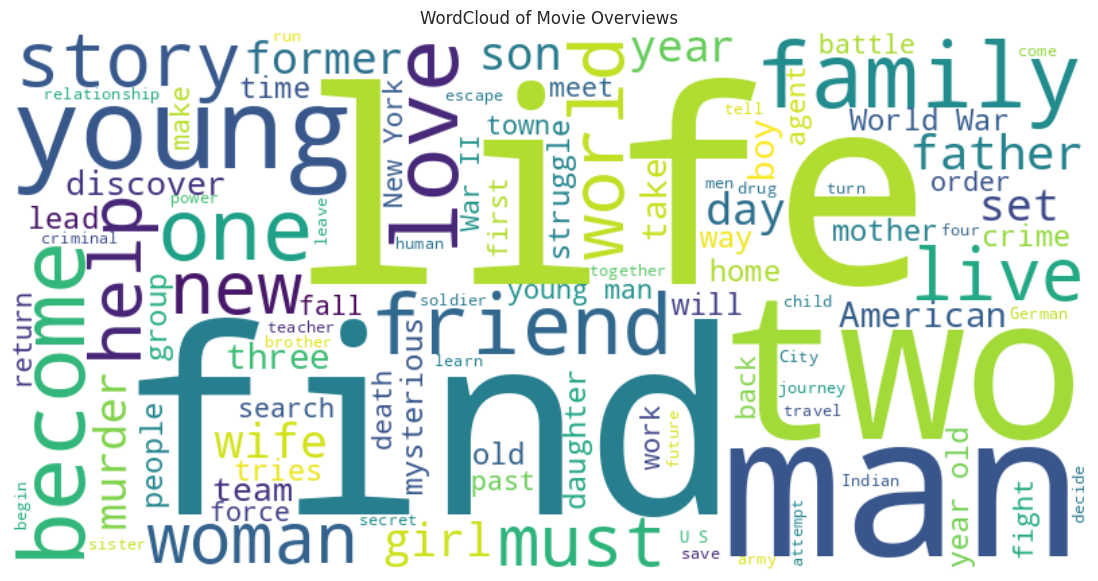


✅ EDA complete — visuals generated and key stats printed.


In [ ]:

# ====== IMPORTS ======
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ====== LOAD CLEANED DATA ======
df = pd.read_csv("imdb_top_1000_clean.csv")

# ====== BASIC INFO ======
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSummary statistics (numeric columns):\n", df.describe())

print("\nMissing values per column:\n", df.isnull().sum())
print("\nCertificate counts:\n", df['Certificate'].value_counts())

# Unique genres
all_genres = df['Genre'].str.split(', ').explode()
print("\nUnique genres:\n", sorted(all_genres.unique()))

# ====== VISUAL SETTINGS ======
sns.set_style("whitegrid")

# ====== PLOTS ======

# 1. Distribution of IMDB Ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# 2. Certificates Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette="Set2")
plt.title('Movies by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

# 3. Release Year Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['Released_Year'], bins=30, color='green')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 4. Runtime Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Runtime'], bins=30, color='purple')
plt.title('Distribution of Runtime (minutes)')
plt.xlabel('Runtime (min)')
plt.ylabel('Count')
plt.show()

# ====== TOP GENRES ======
genre_counts = df['Genre'].str.split(', ').explode().value_counts()
print("\nTop 10 Genres:\n", genre_counts.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='magma')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# ====== TOP DIRECTORS ======
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 Directors:\n", top_directors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

# ====== WORDCLOUD FROM OVERVIEW ======
text = " ".join(df['Overview'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud of Movie Overviews')
plt.show()

print("\n✅ EDA complete — visuals generated and key stats printed.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# === Step 1: Load IMDb Top 1000 dataset ===
df = pd.read_csv("imdb_top_1000_clean.csv")
df['Series_Title'] = df['Series_Title'].str.strip()

# === Step 2: Combine movie metadata (with weighted features) ===
def combine_features(row):
    genre_weighted = (row['Genre'] + " ") * 3      # triple weight to genres
    cert_weighted = (row['Certificate'] + " ") * 2 # double weight to certificate
    return f"{genre_weighted} {cert_weighted} {row['Overview']} {row['Director']} {row['Star1']} {row['Star2']} {row['Star3']} {row['Star4']}"

df['combined_features'] = df.apply(combine_features, axis=1)

# === Step 3: Create TF-IDF matrix ===
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# === Step 4: Cosine similarity matrix ===
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Use a Series for quick lookup (keeps duplicates)
indices = pd.Series(df.index, index=df['Series_Title'])

# === Step 5: Recommendation function for a user profile ===
def recommend_for_user(preferred_genres, watched_titles, top_n=10):
    scores = np.zeros(len(df))

    # 1. Boost scores for matching preferred genres
    for genre in preferred_genres:
        mask = df['Genre'].str.contains(genre, case=False, na=False)
        scores[mask] += 1.0

    # 2. Boost scores for similarity to watched movies (handle duplicates safely)
    for title in watched_titles:
        if title in indices:
            idx = indices[title]
            if isinstance(idx, (pd.Series, list, np.ndarray)):
                # Average similarity scores if multiple same-titled movies
                sim_vec = cosine_sim[idx].mean(axis=0)
            else:
                sim_vec = cosine_sim[idx]
            scores += sim_vec

    # 3. Exclude watched movies
    watched_idx = indices[watched_titles].values \
        if isinstance(indices[watched_titles], pd.Series) else [indices[watched_titles]]
    scores[watched_idx] = -1

    # 4. Sort by score and get top N
    recommended_idx = np.argsort(scores)[::-1][:top_n]
    return df[['Series_Title', 'Genre', 'IMDB_Rating']].iloc[recommended_idx]

# === Step 6: Evaluation function (Precision@K & Recall@K) ===
def precision_recall_at_k(k=5):
    precisions, recalls = [], []

    for _, row in df.iterrows():
        watched = [row['Series_Title']]
        preferred_genres = row['Genre'].split(', ')
        recs = recommend_for_user(preferred_genres, watched, top_n=k)

        # Genres in the recommendations
        rec_genres = set()
        for g in recs['Genre']:
            rec_genres.update(g.split(', '))

        target_genres = set(preferred_genres)
        tp = len(target_genres.intersection(rec_genres))
        fp = len(rec_genres) - tp
        fn = len(target_genres) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)

    return np.mean(precisions), np.mean(recalls)

# === Step 7: Example usage ===
user_genres = ["Action", "Drama"]
user_watched = ["The Godfather"]

print("\n📊 Recommendations for example user:")
print(recommend_for_user(user_genres, user_watched, top_n=10))

# === Step 8: Evaluate model ===
precision, recall = precision_recall_at_k(k=5)
print(f"\n📈 Precision@5: {precision:.3f}")
print(f"📈 Recall@5: {recall:.3f}")



📊 Recommendations for example user:
            Series_Title                 Genre  IMDB_Rating
888          Baby Driver  Action, Crime, Drama          7.6
663         The Fugitive  Action, Crime, Drama          7.8
768  Lucky Number Slevin  Action, Crime, Drama          7.7
241    Kill Bill: Vol. 1  Action, Crime, Drama          8.1
931          Lord of War  Action, Crime, Drama          7.6
308           White Heat  Action, Crime, Drama          8.1
850     Enter the Dragon  Action, Crime, Drama          7.7
968         Falling Down  Action, Crime, Drama          7.6
782          Man on Fire  Action, Crime, Drama          7.7
896   Hell or High Water  Action, Crime, Drama          7.6

📈 Precision@5: 0.691
📈 Recall@5: 0.991


In [ ]:
import joblib
joblib.dump(df, "movies_df.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(tfidf_matrix, "tfidf_matrix.pkl")
joblib.dump(cosine_sim, "cosine_similarity.pkl")
joblib.dump(indices, "title_indices.pkl")

print("✅ Model and required files saved successfully!")

✅ Model and required files saved successfully!


In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import json, os
from math import ceil
from streamlit_searchbox import st_searchbox

USER_DATA_FILE = "user_data.json"

# ===== User Data Storage =====
def load_user_data():
    if os.path.exists(USER_DATA_FILE):
        with open(USER_DATA_FILE, "r") as f:
            return json.load(f)
    return {}

def save_user_data(data):
    with open(USER_DATA_FILE, "w") as f:
        json.dump(data, f)

def signup_user(username):
    data = load_user_data()
    if username in data: return False
    data[username] = {"genres": [], "watched": []}
    save_user_data(data)
    return True

def load_user(username): return load_user_data().get(username)

def update_user_genres(username, genres):
    data = load_user_data()
    if username in data:
        data[username]['genres'] = genres
        save_user_data(data)

def update_watched(username, watched_list):
    data = load_user_data()
    if username in data:
        data[username]['watched'] = watched_list
        save_user_data(data)

# ===== Load Model/Data =====
@st.cache_resource
def load_model():
    df = joblib.load("movies_df.pkl")
    cosine_sim = joblib.load("cosine_similarity.pkl")
    indices = joblib.load("title_indices.pkl")
    return df, cosine_sim, indices

df, cosine_sim, indices = load_model()

# ===== Recommendation Logic =====
def recommend_for_user(preferred_genres, watched_titles, top_n=10):
    scores = np.zeros(len(df))
    if len(watched_titles) >= 3: genre_weight, watch_weight = 0.3, 4.0
    elif watched_titles: genre_weight, watch_weight = 0.5, 3.5
    else: genre_weight, watch_weight = 2.0, 0.0

    for genre in preferred_genres:
        scores[df['Genre'].str.contains(genre, case=False, na=False)] += genre_weight

    for title in watched_titles:
        if title in indices:
            idx = indices[title]
            sim_vec = cosine_sim[idx].mean(axis=0) if isinstance(idx,(pd.Series,list,np.ndarray)) else cosine_sim[idx]
            scores += watch_weight * sim_vec

    watched_idx = []
    for t in watched_titles:
        if t in indices:
            idx_val = indices[t]
            watched_idx.extend(idx_val if isinstance(idx_val,(pd.Series,list,np.ndarray)) else [idx_val])

    scores[watched_idx] = -1
    rec_df = df.iloc[np.argsort(scores)[::-1]]
    rec_df = rec_df[~rec_df['Series_Title'].isin(watched_titles)]
    signup_df = rec_df[rec_df['Genre'].str.contains('|'.join(preferred_genres), case=False)]
    return pd.concat([signup_df.head(3), rec_df]).drop_duplicates().head(top_n)[['Series_Title','Genre','IMDB_Rating']]

# ===== Emoji Mapping =====
genre_emojis = {
    "action":"🎬","comedy":"😂","drama":"🎭","romance":"❤️","thriller":"🔪","horror":"👻",
    "sci-fi":"👽","science fiction":"👽","adventure":"🧭","fantasy":"🦄","animation":"🐭",
    "documentary":"🎥","crime":"🕵️","mystery":"🕵️","war":"⚔️","musical":"🎶","music":"🎶"
}
def get_dominant_genre_with_emoji(genre_string, signup_genres=None):
    genres_list = [g.strip() for g in genre_string.split(",")]
    if signup_genres:
        for sg in signup_genres:
            for g in genres_list:
                if sg.lower() in g.lower():
                    return genre_emojis.get(g.lower(),"🎞️"), genre_string
    for g in genres_list:
        if g.lower() in genre_emojis:
            return genre_emojis[g.lower()], genre_string
    return "🎞️", genre_string

# Inject hover effect CSS once
st.markdown("""
<style>
.movie-card {
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: pointer;
}
.movie-card:hover {
    transform: scale(1.05);
    box-shadow: 0 8px 20px rgba(0,0,0,0.3);
    position: relative;
    z-index: 10;
}
</style>
""", unsafe_allow_html=True)

# ===== Card Renderer =====
def movie_card(row, watched_list, username, section, reason=None, show_button=True, signup_genres=None):
    dark = st.session_state.dark_mode
    bg_color = "#23272e" if dark else "#fdfdfe"
    text_color = "#f5f5f5" if dark else "#222"
    border_color = "#3d434d" if dark else "#e2e3e6"
    genre_color = "#b2b2b2" if dark else "#5A5A5A"
    rating_color = "#fcb900"
    emoji, genre_text = get_dominant_genre_with_emoji(row["Genre"], signup_genres)
    html = f'''
    <div class="movie-card" style="border:1.5px solid {border_color};border-radius:10px;padding:12px;
    margin-bottom:16px;background:{bg_color};color:{text_color};
    box-shadow:0 2px 6px rgba(0,0,0,0.08);">
        <div style="font-weight:700;font-size:1.1rem;">{row["Series_Title"]}</div>
        <div style="color:{genre_color};margin-bottom:5px;">{emoji} <span style="font-style: italic;">{genre_text}</span></div>
        <div style="color:{rating_color};margin-bottom:8px;">⭐ {row["IMDB_Rating"]:.1f}/10</div>
        {f'<div style="color:#399ed7;margin-bottom:8px;">💡 {reason}</div>' if reason else ""}
    </div>
    '''
    st.markdown(html, unsafe_allow_html=True)
    if show_button:
        key = f"watched_{section}_{row.name}"
        st.markdown("""
            <style>
            .watched-btn {
                background-color: #4CAF50;
                color: white;
                padding: 6px 14px;
                font-size: 14px;
                border: none;
                border-radius: 6px;
                cursor: pointer;
            }
            .watched-btn:hover {
                background-color: #45a049;
            }
            .watched-btn:disabled {
                background-color: #888;
                cursor: default;
            }
            </style>
        """, unsafe_allow_html=True)
        if row['Series_Title'] not in watched_list:
            if st.button("✅ Watched", key=key, help="Mark this as watched"):
                watched_list.append(row['Series_Title'])
                update_watched(username, watched_list)
                st.rerun()
        else:
            st.button("✅ Watched", key=key, disabled=True)

# ===== Render Grid =====
def render_cards(dataframe, watched_list, username, section, show_button=True, reason_map=None, signup_genres=None):
    cols_per_row = 3
    for r in range(ceil(len(dataframe) / cols_per_row)):
        cols = st.columns(cols_per_row)
        for c in range(cols_per_row):
            idx = r*cols_per_row + c
            if idx < len(dataframe):
                row = dataframe.iloc[idx]
                reason = reason_map.get(row['Series_Title']) if reason_map else None
                with cols[c]:
                    movie_card(row, watched_list, username, section, reason, show_button, signup_genres)

# ===== Login/Signup Page =====
def login_signup_page():
    st.title("Movie Recommender – Login / Signup")
    opt = st.radio("Select option", ["Login", "Signup"], horizontal=True)
    username = st.text_input("Username")
    password = st.text_input("Password", type="password")
    if opt == "Signup":
        if st.button("Signup") and username and password:
            if len(password) < 5:
                st.error("Password must be at least 5 characters long.")
            else:
                if signup_user(username):
                    st.session_state.username = username
                    st.session_state.watched, st.session_state.genres, st.session_state.temp_selected_genres = [], [], []
                    st.session_state.page = "genre_select"
                    st.rerun()
                else:
                    st.error("Username already exists")
    else:
        if st.button("Login") and username and password:
            user = load_user(username)
            if user:
                st.session_state.username = username
                st.session_state.watched = user.get("watched", [])
                st.session_state.genres = user.get("genres", [])
                if not st.session_state.genres:
                    st.session_state.temp_selected_genres = []
                st.session_state.page = "dashboard" if st.session_state.genres else "genre_select"
                st.rerun()
            else:
                st.error("User not found")

# ===== Genre Selection Page =====
def genre_selection_page():
    st.title(f"Welcome, {st.session_state.username}!")
    st.subheader("Select Your Favourite Genres")
    all_genres = sorted(set(g for glist in df['Genre'].str.split(', ') for g in glist))
    if "temp_selected_genres" not in st.session_state:
        st.session_state.temp_selected_genres = []
    cols_per_row = 4
    cols = st.columns(cols_per_row)
    for idx, genre in enumerate(all_genres):
        emoji = genre_emojis.get(genre.lower(), "🎞️")
        selected = genre in st.session_state.temp_selected_genres
        btn_label = f"✅ {emoji} {genre}" if selected else f"{emoji} {genre}"
        with cols[idx % cols_per_row]:
            if st.button(btn_label, key=f"genre_{genre}_btn"):
                if selected:
                    st.session_state.temp_selected_genres.remove(genre)
                else:
                    st.session_state.temp_selected_genres.append(genre)
                st.rerun()
    if st.button("Next ➡️"):
        if st.session_state.temp_selected_genres:
            update_user_genres(st.session_state.username, st.session_state.temp_selected_genres)
            st.session_state.genres = st.session_state.temp_selected_genres.copy()
            st.session_state.scroll_to_top = True
            st.session_state.page = "dashboard"
            st.rerun()
        else:
            st.error("Please select at least one genre to continue.")

# ===== Search helper functions =====
def search_top_movies(searchterm: str):
    if not searchterm:
        return df.sort_values(by="IMDB_Rating", ascending=False)["Series_Title"].head(10).tolist()
    results = df[df["Series_Title"].str.lower().str.contains(searchterm.lower()) |
                 df["Genre"].str.lower().str.contains(searchterm.lower())]
    return results["Series_Title"].head(10).tolist()

def search_watched_movies(searchterm: str):
    watched_df = df[df['Series_Title'].isin(st.session_state.watched)]
    if not searchterm:
        return watched_df["Series_Title"].tolist()
    results = watched_df[watched_df["Series_Title"].str.lower().str.contains(searchterm.lower()) |
                         watched_df["Genre"].str.lower().str.contains(searchterm.lower())]
    return results["Series_Title"].head(10).tolist()

def search_recommended_movies(searchterm: str):
    recs = recommend_for_user(st.session_state.genres, st.session_state.watched, 10)
    if not searchterm:
        return recs["Series_Title"].tolist()
    results = recs[recs["Series_Title"].str.lower().str.contains(searchterm.lower()) |
                   recs["Genre"].str.lower().str.contains(searchterm.lower())]
    return results["Series_Title"].head(10).tolist()

# ===== Dashboard Page =====
def dashboard_page():
    if st.session_state.get("scroll_to_top", False):
        st.markdown("<script>window.scrollTo({top: 0, behavior: 'instant'});</script>", unsafe_allow_html=True)
        st.session_state.scroll_to_top = False

    st.sidebar.checkbox("🌙 Dark Mode", key="dark_mode")
    if st.sidebar.button("🚪 Logout"):
        st.session_state.page, st.session_state.username = "login_signup", ""
        st.session_state.genres, st.session_state.watched, st.session_state.temp_selected_genres = [], [], []
        st.rerun()

    st.markdown(
    f"""
    <div style="
        font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif;
        font-size: 36px;
        font-weight: 600;
        color: #e74c3c;
        margin-bottom: 25px;
        padding-top: 15px;
        letter-spacing: 1px;
    ">
        Welcome, {st.session_state.username}!
    </div>
    """,
    unsafe_allow_html=True
    )

    tab1, tab2, tab3 = st.tabs(["⭐ Top Rated", "🎥 Your Watching", "🎯 Recommendations"])

    with tab1:
        top_movies = df.sort_values(by="IMDB_Rating", ascending=False)
        mixed_df = pd.concat([
            top_movies[top_movies['Genre'].str.contains(g, case=False)].head(3)
            for g in set(g for lst in df['Genre'].str.split(', ') for g in lst)
        ]).drop_duplicates("Series_Title")
        mixed_df = mixed_df[~mixed_df['Series_Title'].isin(st.session_state.watched)].head(50)

        selected_title = st_searchbox(search_top_movies, placeholder="Search top movies...", key="top_searchbox")
        if selected_title:
            mixed_df = mixed_df[mixed_df['Series_Title'] == selected_title]
        render_cards(mixed_df, st.session_state.watched, st.session_state.username, "top", True, signup_genres=st.session_state.genres)

    with tab2:
        watched_df = df[df['Series_Title'].isin(st.session_state.watched)]
        if watched_df.empty:
            st.info("You haven’t watched anything yet!")
        else:
            selected_title = st_searchbox(search_watched_movies, placeholder="Search watched movies...", key="watched_searchbox")
            if selected_title:
                watched_df = watched_df[watched_df['Series_Title'] == selected_title]
            render_cards(watched_df, st.session_state.watched, st.session_state.username, "your", False, signup_genres=st.session_state.genres)

    with tab3:
        recs = recommend_for_user(st.session_state.genres, st.session_state.watched, 10)
        reason_map = {}
        for idx, row in recs.iterrows():
            reasons = []
            watched_reasons = [
                w for w in st.session_state.watched
                if w in indices and cosine_sim[indices[w]][idx] > 0.1
            ]
            if watched_reasons:
                reasons.append("You watched " + ", ".join(watched_reasons[:3]))
            genre_matches = [g for g in st.session_state.genres if g.lower() in row["Genre"].lower()][:3]
            if genre_matches:
                reasons.append("You selected genre(s) " + ", ".join(genre_matches))
            reason_map[row['Series_Title']] = " and ".join(reasons) if reasons else None

        selected_title = st_searchbox(search_recommended_movies, placeholder="Search recommended movies...", key="rec_searchbox")
        if selected_title:
            recs = recs[recs['Series_Title'] == selected_title]
        render_cards(recs, st.session_state.watched, st.session_state.username, "rec", True, reason_map, signup_genres=st.session_state.genres)

# ===== Routing =====
if "page" not in st.session_state: st.session_state.page = "login_signup"
if "genres" not in st.session_state: st.session_state.genres = []
if "watched" not in st.session_state: st.session_state.watched = []
if "temp_selected_genres" not in st.session_state: st.session_state.temp_selected_genres = []

if st.session_state.page == "login_signup": login_signup_page()
elif st.session_state.page == "genre_select": genre_selection_page()
elif st.session_state.page == "dashboard": dashboard_page()